# Project 1 Student Marks


In [1]:
!pip install mysql-connector-python


In [2]:
#importing sql connector
import mysql.connector

In [3]:
##lets connect to the server
import pandas as pd
con=mysql.connector.connect(
host="127.0.0.1",
port=3306,
user="root",
password="Lovemyf@mily5",
database="students_marksdb")

In [4]:
#lets check the dataset
df=pd.read_sql_query("select * from students_marks",con)
df
df.head(15)

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,None,55,45,56,87,21,52,89,65
1,Suresh,M,None,75,96,78,64,90,61,58,2
2,Ramesh,M,None,25,54,89,76,95,87,56,74
3,Jessica,F,None,78,96,86,63,54,89,75,45
4,Jennifer,F,None,58,96,78,46,96,77,83,53
5,Annu,F,None,45,87,52,89,55,89,87,52
6,pooja,F,None,55,64,61,58,75,58,64,61
7,Ritesh,M,None,54,76,87,56,25,56,76,87
8,Farha,F,None,55,63,89,75,78,75,63,89
9,Mukesh,M,None,96,46,77,83,58,83,46,77


In [5]:
#importing essenstial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
#checking shape of dataset
df.shape

(10, 10)

In [6]:
#lets find data types of various attributes in dataset
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [33]:
# stastistical analysis :
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [7]:
#lets check the number of null values
print(df.isnull().sum())

Name          0
Gender        0
DOB          10
Maths         0
Physics       0
Chemistry     0
English       0
Biology       0
Economics     0
History       0
Civics        0
dtype: int64


In [8]:
#dropping irrelevant columns from dataset
df=df.drop('DOB',axis=1)
df.head


<bound method NDFrame.head of        Name Gender  Maths  Physics  Chemistry  English  Biology  Economics  \
0      John      M     55       45         56       87       21         52   
1    Suresh      M     75       96         78       64       90         61   
2    Ramesh      M     25       54         89       76       95         87   
3   Jessica      F     78       96         86       63       54         89   
4  Jennifer      F     58       96         78       46       96         77   
5      Annu      F     45       87         52       89       55         89   
6     pooja      F     55       64         61       58       75         58   
7    Ritesh      M     54       76         87       56       25         56   
8     Farha      F     55       63         89       75       78         75   
9    Mukesh      M     96       46         77       83       58         83   

   History  Civics  
0       89      65  
1       58       2  
2       56      74  
3       75      45  
4     

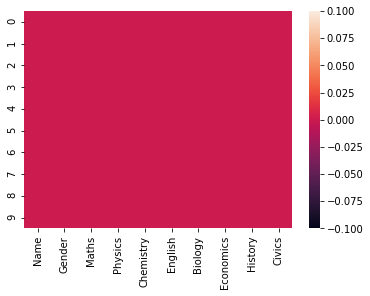

In [32]:
#heat map of null values
import seaborn as sns
sns.heatmap(df.isnull())

In [11]:
#lets check the number of null values
print(df.isnull().sum())

Name         0
Gender       0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64


In [10]:
#lets check the number of duplicates
duplicate_rows_df = df[df.duplicated()]
print("no of duplicate rows:", duplicate_rows_df.shape)

no of duplicate rows: (0, 10)


In [34]:
# corelation Analysis :
dfr=df.corr()
dfr

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


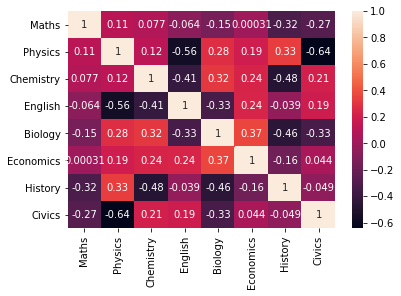

In [35]:
#lets see correlation of marks in subjects
sns.heatmap(dfr,annot=True)

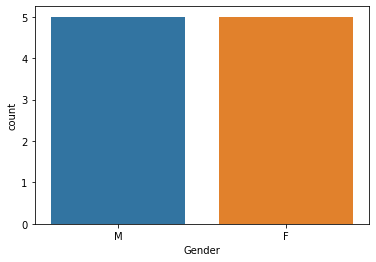

In [45]:
#lets see no. of boys anf girls through graph
sns.countplot(df['Gender'])

<Figure size 1008x1728 with 0 Axes>

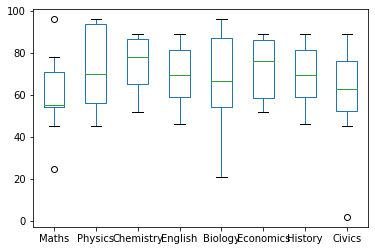

In [37]:
#lets check boxplot graph of subjects
plt.figure(figsize=(14,24))
df.plot.box()
plt.show()

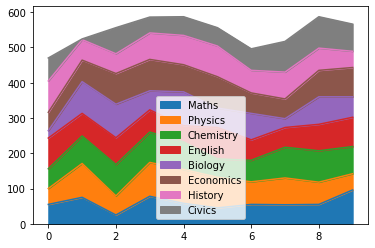

In [40]:
#area graph
df.plot.area()

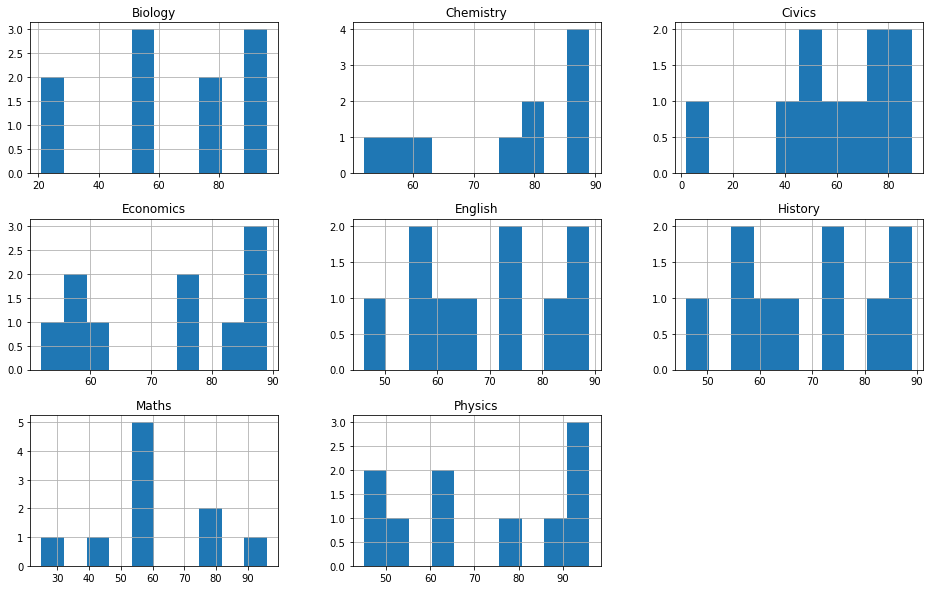

In [41]:
#histogram graph
df.hist(figsize=(16,10))
plt.show()

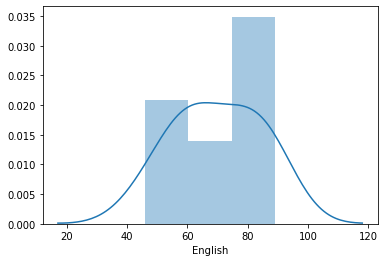

In [43]:
#lets see distribution graph of English subject
sns.distplot(df['English'])

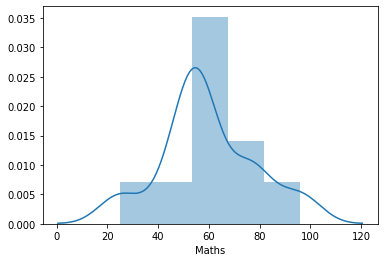

In [44]:
##lets see distribution graph of Maths subject
sns.distplot(df['Maths'])

In [47]:
import joblib
joblib.dump(df,'Project1_EDA_student_marks_joblib')

['Project1_EDA_student_marks_joblib']